# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
   
    city_url = url+"appid="+weather_api_key+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | khandyga
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | pionerskiy
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | acapulco de juarez
Processing Record 12 of Set 1 | goaso
City not found. Skipping...
Processing Record 13 of Set 1 | prestea
Processing Record 14 of Set 1 | selfoss
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | iron river
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame.from_dict(city_data)
# Show Record Count
city_data_df.count()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,281.54,97,100,11.45,TF,1711762035
1,wailua homesteads,22.0669,-159.3780,300.39,71,20,7.20,US,1711762037
2,port mathurin,-19.6833,63.4167,299.75,84,97,6.10,MU,1711762038
3,khandyga,62.6667,135.6000,258.12,93,100,1.88,RU,1711762040
4,saint-philippe,-21.3585,55.7679,297.92,77,100,1.98,RE,1711762041
...,...,...,...,...,...,...,...,...,...
548,altai,46.3722,96.2583,279.72,30,62,0.96,MN,1711762872
549,toccoa,34.5773,-83.3324,289.92,27,0,4.12,US,1711762873
550,chibougamau,49.9168,-74.3659,269.94,63,100,5.66,CA,1711762875
551,camlidere,40.4896,32.4750,277.47,80,54,1.46,TR,1711762878


In [5]:
# Display sample data
city_data_df["Max Temp"] = city_data_df["Max Temp"].apply(lambda x: (x -273.15))
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,8.39,97,100,11.45,TF,1711762035
1,wailua homesteads,22.0669,-159.3780,27.24,71,20,7.20,US,1711762037
2,port mathurin,-19.6833,63.4167,26.60,84,97,6.10,MU,1711762038
3,khandyga,62.6667,135.6000,-15.03,93,100,1.88,RU,1711762040
4,saint-philippe,-21.3585,55.7679,24.77,77,100,1.98,RE,1711762041


In [6]:
# Export the City_Data into a csv
#!mkdir output_data
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.39,97,100,11.45,TF,1711762035
1,wailua homesteads,22.0669,-159.3780,27.24,71,20,7.20,US,1711762037
2,port mathurin,-19.6833,63.4167,26.60,84,97,6.10,MU,1711762038
3,khandyga,62.6667,135.6000,-15.03,93,100,1.88,RU,1711762040
4,saint-philippe,-21.3585,55.7679,24.77,77,100,1.98,RE,1711762041


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

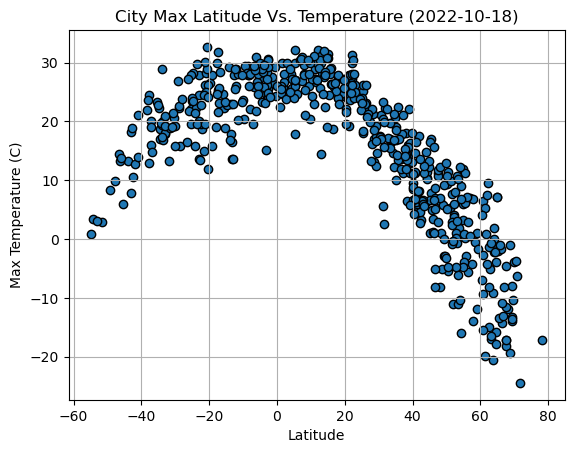

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude Vs. Temperature (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

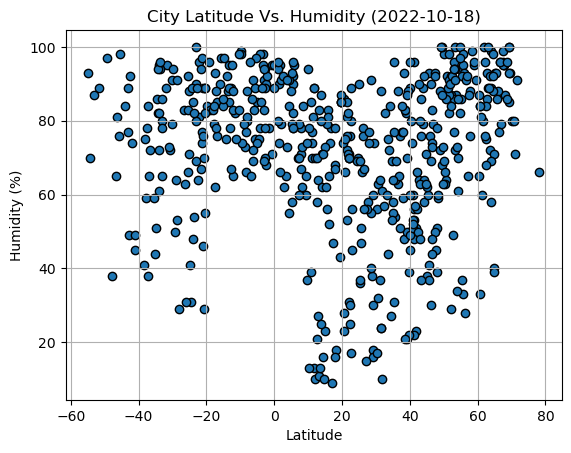

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

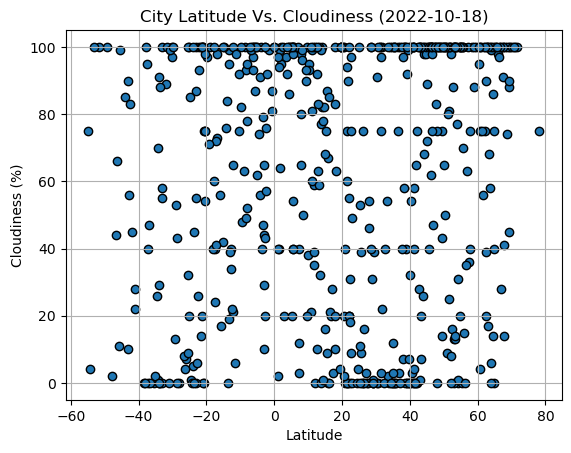

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs. Cloudiness (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

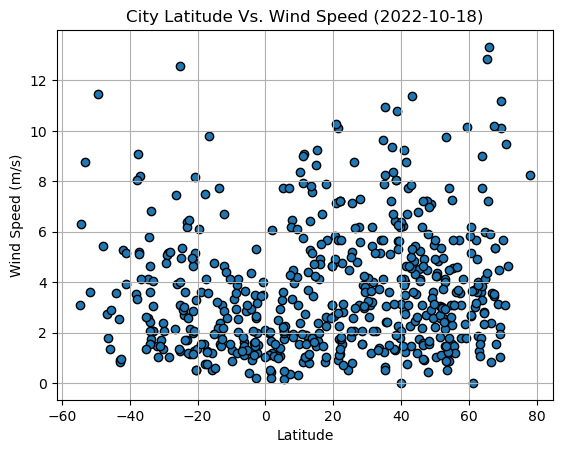

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude Vs. Wind Speed (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression(x_value,y_value):
    (slope , intercept,rvalue,pvalue,stderr) = linregress(x_value,y_value)
    line_value=x_value * slope + intercept
    line_eq="y="+str(round(slope,2))+"x +"+str(round(intercept,2))
    plt.plot(x_value,line_value,"r-")
    plt.annotate(line_eq,(np.mean(x_value),np.min(y_value)),fontsize=15,color="red")
    #plt.annotate(line_eq,(20,250),fontsize=15,color="red")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,27.24,71,20,7.20,US,1711762037
3,khandyga,62.6667,135.6000,-15.03,93,100,1.88,RU,1711762040
5,thompson,55.7435,-97.8558,-2.91,33,100,3.09,CA,1711761886
6,pionerskiy,54.9508,20.2275,11.91,82,100,7.27,RU,1711762044
8,albany,42.6001,-73.9662,3.29,64,28,2.24,US,1711761954


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.39,97,100,11.45,TF,1711762035
2,port mathurin,-19.6833,63.4167,26.60,84,97,6.10,MU,1711762038
4,saint-philippe,-21.3585,55.7679,24.77,77,100,1.98,RE,1711762041
7,waitangi,-43.9535,-176.5597,13.23,84,85,3.58,NZ,1711761799
9,lebu,-37.6167,-73.6500,12.87,78,95,9.10,CL,1711762048


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.90155441040777


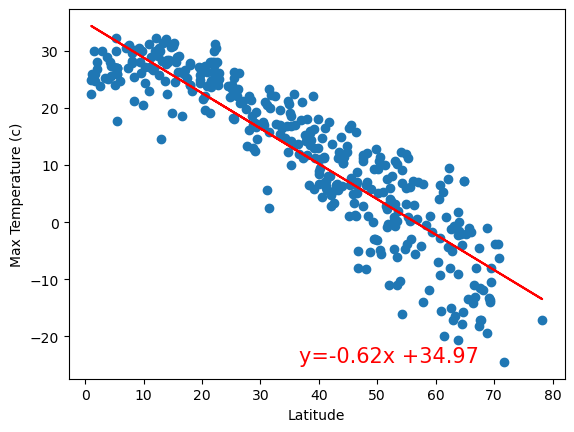

In [15]:
# Linear regression on Northern Hemisphere

x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Max Temp"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()


The r-value is:0.6904745543214432


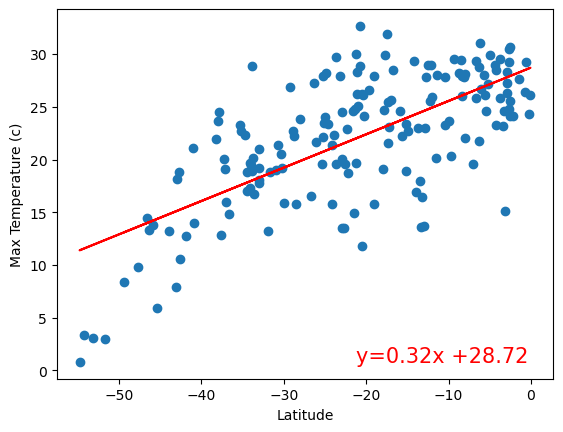

In [16]:
# Linear regression on Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Max Temp"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

## Discussion about the linear relationship: 
 Considering the Latitudes Vs. Temperature plots on different hemispheres:
* Northern Hemisphere shows a strong negative correlation between latitude and temperature. That is as the latitude increases the temperature falls.
* The Southern Hemisphere shows a moderate positive correlation between latitude and temperature. That is as the latitude increases the temperature also increases.
The R-values obtained in this analysis also support the above conclusions.


### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.25356873184408785


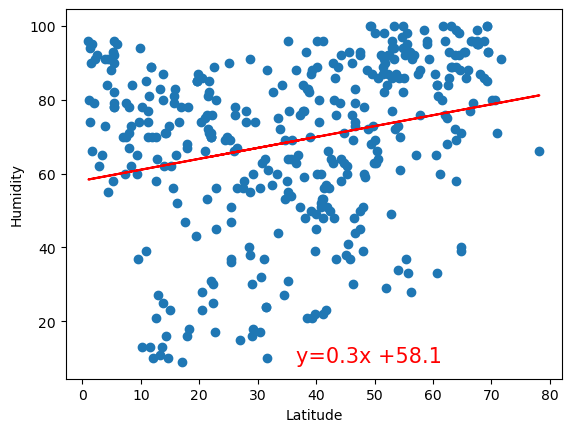

In [17]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Humidity"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is:0.25531730874682323


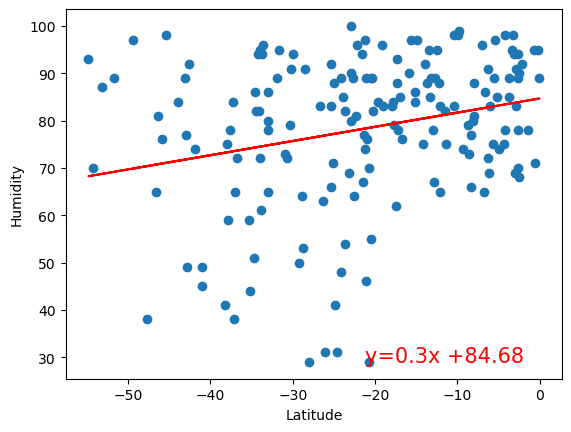

In [18]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Humidity"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Discussion about the linear relationship:
Considering the Latitude vs. Humidity plots on different hemispheres:
* Northern Hemisphere shows a weak positive linear relation between Latitude and Humidity. 
* The correlation between humidity and latitude is considerably weak in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.13055737042225837


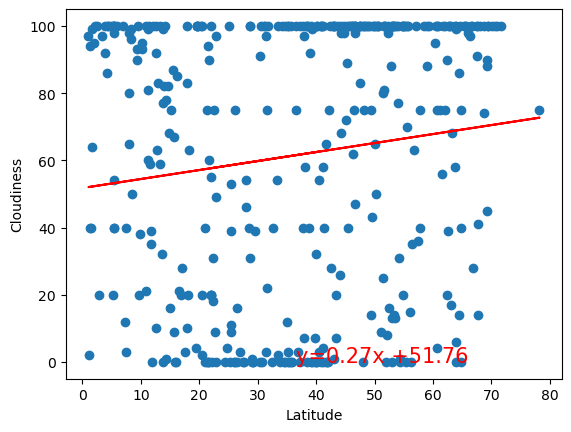

In [19]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Cloudiness"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is:0.273018790697929


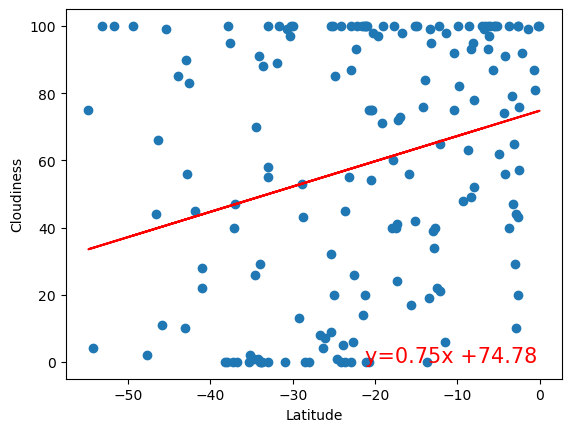

In [20]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Cloudiness"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Discussion about the linear relationship:
*Northern Hemisphere:
Considering the r-value it shows these two parameters (Latitude and cloudiness) have a weak correlation.

*Southern Hemisphere:
Here when we consider the r-value, it shows that the correlation between latitude and cloudiness is very weak. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.13748116785412634


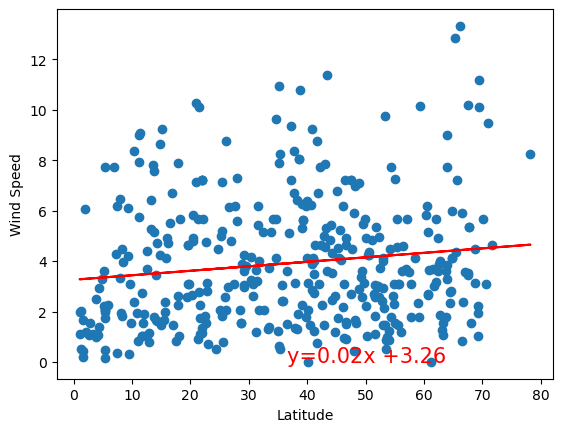

In [21]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Wind Speed"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is:-0.2863419109594446


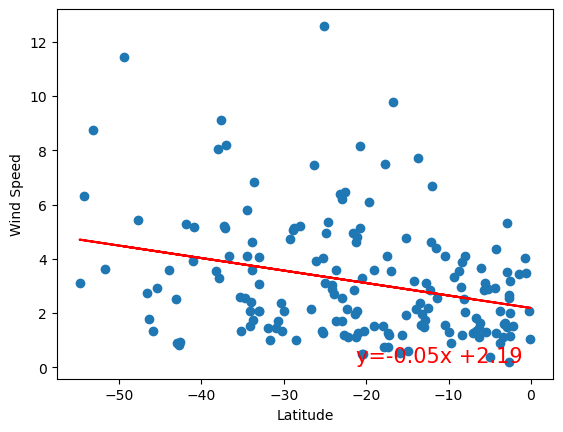

In [22]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Wind Speed"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Discussion about the linear relationship:
* Northern Hemisphere:
Considering the r-value it shows these two parameters (Latitude, Wind Speed) have a very weak/none correlation.

*Southern Hemisphere:
Here also the Latitude and Wind Speed show a very weak/no correlation.
